### Guided Practice: Logit Function and Odds

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
# Statsmodels logistic regression is sm.Logit
import statsmodels.api as sm
%matplotlib inline

## Probability, e, Log, and Log Odds
---

To understand how logistic regression predicts the probability of class membership we need to start by understanding the relationship between probability, odds ratios, and log odds ratios. This is because logistic regression predicts log odds and so reading log odds is extremely useful for interpreting logistic regression.

$$probability = \frac {one\ outcome} {all\ outcomes}$$

$$odds = \frac {one\ outcome} {all\ other\ outcomes}$$

It is often useful to think of the numeric odds as a ratio. For example, 5/1 = 5 odds is "5 to 1" -- five wins for every one loss (e.g. of six total plays). 2/3 odds means "2 to 3" -- two wins for every three losses (e.g. of five total plays).

Examples:

- Dice roll of 1: probability = 1/6, odds = 1/5
- Even dice roll: probability = 3/6, odds = 3/3 = 1
- Dice roll less than 5: probability = 4/6, odds = 4/2 = 2

$$odds = \frac {probability} {1 - probability}$$

$$probability = \frac {odds} {1 + odds}$$

**As an example we can create a table of probabilities vs. odds, as seen below.**

In [2]:
# Create a table of probability versus odds.
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability / (1 - table.probability)
table

probability      odds
0         0.10  0.111111
1         0.20  0.250000
2         0.25  0.333333
3         0.50  1.000000
4         0.60  1.500000
5         0.80  4.000000
6         0.90  9.000000

<a id="understanding-e-and-the-natural-logarithm"></a>
### Understanding e and the Natural Logarithm

What is e? It is the base rate of growth shared by all continually growing processes:

e is the irrational base of the natural log `ln`.

- 2.718281828459

In [3]:
# Exponential function: e^1
e = np.exp(1)
e

2.718281828459045

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [4]:
# Time needed to grow 1 unit to 2.718 units
# ln e = 1
np.log(2.718281828459) # very close to previous value of 1

0.9999999999999832

In [5]:
np.log(e)

1.0

It is also the inverse of the exponential function:

In [6]:
# e^5
np.exp(5)

148.4131591025766

In [7]:
# np.exp(5)
2.7182818**5

148.41315133352072

In [8]:
# Taking the log of the exponential returns back to original input
np.log(np.exp(5))

5.0

Lets take one of our odds from our table and walk through how it works.

In [9]:
# Odds = 0.25
# ln 0.25 = -1.38629436
np.log(0.25)

-1.3862943611198906

In [10]:
print(e**-1.3862943611198906)
print(np.exp(-1.3862943611198906))

0.25000000000000006
0.25


<a id="the-log-odds"></a>

When we take the logarithm of the odds, we get what is known as the **log odds**. This may seem like an arbitrary transformation, but it has an important property: The log odds has the range $[-\infty, \infty]$. This is not true for the odds ratio, which can never be a negative number.

In [11]:
# Add log odds to the table.
table['logodds'] = np.log(table['odds'])
table

probability      odds   logodds
0         0.10  0.111111 -2.197225
1         0.20  0.250000 -1.386294
2         0.25  0.333333 -1.098612
3         0.50  1.000000  0.000000
4         0.60  1.500000  0.405465
5         0.80  4.000000  1.386294
6         0.90  9.000000  2.197225

<a id="what-is-logistic-regression"></a>
## What Is Logistic Regression?
---

Linear regression: Continuous response is modeled as a linear combination of the features.

$$y = \beta_0 + \beta_1x$$

Logistic regression: Log odds of a categorical response being "true" (1) is modeled as a linear combination of the features.

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

This is called the logit function.

Probability is sometimes written as pi.

$$\log \left({\pi\over 1-\pi}\right) = \beta_0 + \beta_1x$$

The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In other words:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We have covered how this works for binary classification problems (two response classes). But what about multi-class classification problems (more than two response classes)?

- The most common solution for classification models is "one-vs-all" (also known as "one-vs-rest"): Decompose the problem into multiple binary classification problems.
- Multinomial logistic regression, on the other hand, can solve this as a single problem, but how this works is beyond the scope of this lesson.

<a id="interpreting-logistic-regression-coefficients"></a>
## Interpreting Logistic Regression Coefficients

---

Logistic regression coefficients are not as immediately interpretable as the coefficients from a linear regression. To interpret the coefficients we need to remember how the formulation for logistic regression differs from linear regression.


Remember:

$$\log \left({p\over 1-p}\right) = \beta_0 + \beta_1x$$

That means we'll get out the log odds if we compute the intercept plus the coefficient times a value for `al`.


# Convert log odds to an odds.
odds = np.exp(logodds)

# Convert odds to probability.
prob = odds/(1 + odds)

Bottom line: Positive coefficients increase the log odds of the response (and thus increase the probability), and negative coefficients decrease the log odds of the response (and thus decrease the probability).

<a id="comparing-logistic-regression-to-other-models"></a>
## Comparing Logistic Regression to Other Models
---

Advantages of logistic regression:

- Highly interpretable (if you remember how).
- Model training and prediction are fast.
- No tuning is required (excluding regularization).
- Features don't need scaling.
- Can perform well with a small number of observations.
- Outputs well-calibrated predicted probabilities.

Disadvantages of logistic regression:

- Presumes a linear relationship between the features and the log odds of the response.
- Performance is (generally) not competitive with the best supervised learning methods.
- Can't automatically learn feature interactions.

### Titanic Problem

** Goals **

1. Prep Titanic data for analysis - look for missing values, create new features, etc.
2. Calculate the odds of surviving titanic based on Age, Sex, and Class of the ticket (Pclass) using logistic regression
3. Interpret the coefficients and 95% Confidence Intervals (CIs) of each model

In [12]:
titanic = pd.read_csv('../../assets/dataset/titanic.csv')

In [13]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Exploratory data analysis 

### Check for missing values 

In [14]:
# Check for missing values
titanic.isnull().sum()

# Filter out columns that have zero missing values per titanic.isnull().sum()
titanic.isnull().sum()[titanic.isnull().sum() != 0].sort_values(ascending=False)

Cabin       687
Age         177
Embarked      2
dtype: int64

### Replace missing age values with the mean age by Sex and Pclass

In [15]:
subgroups = titanic.groupby(["Sex", 'Pclass']).mean()
subgroups["Age"]

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [16]:
titanic['Age'] = titanic.groupby(["Sex", 'Pclass'])["Age"].transform(lambda x: x.fillna(x.mean()))

In [17]:
# Check for missing values
titanic.isnull().sum()

# Filter out columns that have zero missing values per titanic.isnull().sum()
titanic.isnull().sum()[titanic.isnull().sum() != 0].sort_values(ascending=False)

Cabin       687
Embarked      2
dtype: int64

### Check the distributions of your features

In [18]:
titanic.describe()   #.style

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.318643    0.523008   
std     257.353842    0.486592    0.836071   13.281103    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   21.750000    0.000000   
50%     446.000000    0.000000    3.000000   26.507589    0.000000   
75%     668.500000    1.000000    3.000000   36.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

### How many people survived? 

In [19]:
titanic["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Explore your other features

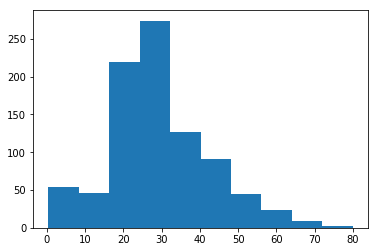

In [20]:
titanic['Age'].hist(grid=False);

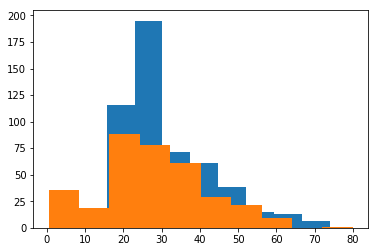

In [21]:
titanic.groupby('Survived').Age.hist(grid=False);

In [22]:
titanic['Pclass'].value_counts()  #.sort_index()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [23]:
titanic["SibSp"].value_counts()   #.sort_index()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [24]:
titanic["Parch"].value_counts()    #.sort_index()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

### How would you clean/combine these features?

Given the sample sizes, most people had neither a parent nor a sibling on board. I'm just creating indicator variables "had_parent" and  "had_sib"

In [25]:
titanic['had_parents'] = titanic.Parch.apply(lambda x: 1 if x > 0 else 0)
titanic['had_parents'].value_counts()

0    678
1    213
Name: had_parents, dtype: int64

In [26]:
titanic['had_siblings'] = titanic.SibSp.apply(lambda x: 1 if x > 0 else 0)
titanic['had_siblings'].value_counts()

0    608
1    283
Name: had_siblings, dtype: int64

### Which additional features require dummy variables? Create dummies for each of your categorical features

In [27]:
titanic['is_female'] = titanic.Sex.apply(lambda x: 1 if x == 'female' else 0)

In [28]:
titanic["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
titanic["is_female"].value_counts()

0    577
1    314
Name: is_female, dtype: int64

In [30]:
titanic.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex    Age  SibSp  Parch      Ticket   Fare Cabin Embarked  \
886    male  27.00      0      0      211536  13.00   NaN        S   
887  female  19.00      0      0      112053  30.00   B42        S   
888  female  21.75      1      2  W./C. 6607  23.45   NaN        S   
889    male  26.00      0      0      111369  30.00  C148        C   
890    male  32.00      0      0      370376   7.75   NaN        Q   

     had_parents  had_siblings  is_female  
886            0             0          0  
887            0             0          1  
888            1             1          1  
889            0             0          0  
890            0             0          0

In [31]:
titanic.corr()   #.style

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId      1.000000 -0.005007 -0.035144  0.039636 -0.057527 -0.001652   
Survived        -0.005007  1.000000 -0.338481 -0.067485 -0.035322  0.081629   
Pclass          -0.035144 -0.338481  1.000000 -0.407015  0.083081  0.018443   
Age              0.039636 -0.067485 -0.407015  1.000000 -0.251313 -0.180705   
SibSp           -0.057527 -0.035322  0.083081 -0.251313  1.000000  0.414838   
Parch           -0.001652  0.081629  0.018443 -0.180705  0.414838  1.000000   
Fare             0.012658  0.257307 -0.549500  0.118308  0.159651  0.216225   
had_parents      0.005167  0.147408 -0.027526 -0.261443  0.462241  0.845092   
had_siblings    -0.053397  0.115867 -0.076009 -0.154778  0.695562  0.356133   
is_female       -0.042939  0.543351 -0.131900 -0.112851  0.114631  0.245489   

                  Fare  had_parents  had_siblings  is_female  
PassengerId   0.012658     0.005167     -0.053397  -0.042939  
Survived      0.257307     0.147408      0.115867   0.543351  
Pclass       -0.549500    -0.027526     -0.076009  -0.131900  
Age           0.118308    -0.261443     -0.154778  -0.112851  
SibSp         0.159651     0.462241      0.695562   0.114631  
Parch         0.216225     0.845092      0.356133   0.245489  
Fare          1.000000     0.237717      0.192190   0.182333  
had_parents   0.237717     1.000000      0.420233   0.247523  
had_siblings  0.192190     0.420233      1.000000   0.203203  
is_female     0.182333     0.247523      0.203203   1.000000

In [32]:
# add heatmap

### Let's see the impact of being female on Titanic

### Start by doing a cross tab of sex and survival

In [33]:
pd.crosstab( titanic["Survived"], titanic["is_female"], margins=True)

is_female    0    1  All
Survived                
0          468   81  549
1          109  233  342
All        577  314  891

### Calculate the OR by hand

In [34]:
#Male 
(109.0/577)/(468.0/577)

0.23290598290598288

In [35]:
oddsSurvival_male = (109.0/577)/(468.0/577)
oddsSurvival_female = (233.0/314)/(81.0/314)
OR = oddsSurvival_female/ oddsSurvival_male
print(oddsSurvival_male)
print(oddsSurvival_female)
print(OR)pppp

#Cross-multiplication: (468.0*233)/(109*81)

0.23290598290598288
2.876543209876543
12.3506625891947


### Write in a sentence 

Answer: Women have 12.35 times the odds of surviving titanic compared to men

In [36]:
titanic['intercept'] = 1.0

X = titanic[['intercept', 'is_female']]

y = titanic['Survived']


lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Jun 2019   Pseudo R-squ.:                  0.2266
Time:                        12:49:32   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.020e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4571      0.106    -13.701      0.000      -1.666      -1.249
is_female      2.5137      0.167     15.036      0.000       2.186       2.841
==============================================================================
"""

### Covert this to an odds ratio

In [37]:
OR_female = np.exp(2.5137)
lowerCI_female = np.exp(2.186)
upperCI_female = np.exp(2.841)
print("Female Odds Ratio: ", OR_female, "(",lowerCI_female,",",upperCI_female,")")

Female Odds Ratio:  12.350542632956996 ( 8.899543648731164 , 17.132889863419138 )


### Write this in a sentance 

Answer: Females have 12.35 times the odds of surviving titanic compared to men. 

### Convert result to probablity  

#### Reminder 
The equation can be rearranged into the logistic function.

$$\hat{p} = \frac{e^{\beta_0 + \beta_1x}} {1 + e^{\beta_0 + \beta_1x}}$$

In [38]:
Prob = np.exp(-1.4571 +2.5137)/ (1+ (np.exp(-1.4571 +2.5137)))
Prob

0.7420402649343216

### As an exercise so that you can see the relationship, repeat from the male prospective 

In [39]:
titanic['is_male'] = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)

In [40]:
pd.crosstab( titanic["Survived"], titanic["is_male"], margins=True)

is_male     0    1  All
Survived               
0          81  468  549
1         233  109  342
All       314  577  891

In [41]:
oddsSurvival_male = (109.0/577)/(468.0/577)
oddsSurvival_female = (233.0/314)/(81.0/314)
OR =  oddsSurvival_male/oddsSurvival_female 
print(oddsSurvival_male)
print(oddsSurvival_female)
print(OR)

0.23290598290598288
2.876543209876543
0.08096731594585671


Men have 0.08 times the odds of surviving titanic compared to women 

In [42]:
titanic['intercept'] = 1.0

X = titanic[['intercept', 'is_male']]

y = titanic['Survived']



lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Jun 2019   Pseudo R-squ.:                  0.2266
Time:                        12:49:36   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.020e-60
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.0566      0.129      8.191      0.000       0.804       1.309
is_male       -2.5137      0.167    -15.036      0.000      -2.841      -2.186
==============================================================================
"""

In [43]:
OR_male = np.exp(-2.5137)
lowerCI_male = np.exp(-2.841)
upperCI_male = np.exp(-2.186)
print("Male Odds Ratio: ", OR_male, "(",lowerCI_male,",",upperCI_male,")")

Male Odds Ratio:  0.08096810235135213 ( 0.058367269501634116 , 0.11236531214076052 )


Men have 0.08 times the odds of surviving titanic compared to women 

### Convert to probability 

In [44]:
male_prob = OR_male/ (1 + OR_male)
male_prob

0.07490332247105908

Men have a 7% chance of surviving Titanic, while women have a 93% chance of surviving Titanic. 

### Multi-variable regression
First let's look at Age alone

In [45]:
titanic['intercept'] = 1.0

X = titanic[['intercept', 'Age']]

y = titanic['Survived']



lm = sm.Logit(y, X)
result = lm.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.663616
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Jun 2019   Pseudo R-squ.:                0.003448
Time:                        12:49:37   Log-Likelihood:                -591.28
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                   0.04311
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1649      0.167     -0.987      0.324      -0.493       0.163
Age           -0.0106      0.005     -2.009      0.045      -0.021      -0.000
==============================================================================
"""

In [46]:
OR = np.exp(result.params)
CI= np.exp(result.conf_int())
print(OR)
print (CI)

intercept    0.847939
Age          0.989458
dtype: float64
                  0         1
intercept  0.611007  1.176746
Age        0.979280  0.999742


Answer: For every additional year of age you have 0.98 times the odds of survival. This is  statistically significant. 

### Now add is_female back in 

In [47]:
titanic['intercept'] = 1.0

X = titanic[['intercept', 'is_female', 'Age']]

y = titanic['Survived']


lm_sex_age = sm.Logit(y, X)
result_sex_age = lm_sex_age.fit()

result_sex_age.summary()

Optimization terminated successfully.
         Current function value: 0.515014
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Jun 2019   Pseudo R-squ.:                  0.2266
Time:                        12:49:37   Log-Likelihood:                -458.88
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.065e-59
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4153      0.217     -6.532      0.000      -1.840      -0.991
is_female      2.5096      0.168     14.926      0.000       2.180       2.839
Age           -0.0014      0.006     -0.221      0.825      -0.014       0.011
==============================================================================
"""

In [48]:
OR = np.exp(result_sex_age.params)
CI= np.exp(result_sex_age.conf_int())

print(OR)
print(CI)

intercept     0.242846
is_female    12.299687
Age           0.998624
dtype: float64
                  0          1
intercept  0.158819   0.371328
is_female  8.846545  17.100719
Age        0.986494   1.010903


### Interpret Age 

Answer:  For every additional year of age you have 0.99 times the odds of survival compared controlling for sex. This is not statistically significant. 

Notice the effect size of is_female >> age and is statistically significant

## Add PCLASS 

In [49]:
titanic['intercept'] = 1.0

X = titanic[['intercept', 'is_female', 'Age', "Pclass"]]

y = titanic['Survived']


lm_full = sm.Logit(y, X)
result_full = lm_full.fit()

result_full.summary()

Optimization terminated successfully.
         Current function value: 0.449672
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Jun 2019   Pseudo R-squ.:                  0.3247
Time:                        12:49:38   Log-Likelihood:                -400.66
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 3.314e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4337      0.440      5.534      0.000       1.572       3.296
is_female      2.5710      0.187     13.759      0.000       2.205       2.937
Age           -0.0375      0.008     -4.923      0.000      -0.052      -0.023
Pclass        -1.2537      0.126     -9.919      0.000      -1.501      -1.006
==============================================================================
"""

In [50]:
OR = np.exp(result_full.params)
CI= np.exp(result_full.conf_int())
print(OR)
print(CI)

intercept    11.401263
is_female    13.079194
Age           0.963185
Pclass        0.285454
dtype: float64
                  0          1
intercept  4.814913  26.997120
is_female  9.068198  18.864311
Age        0.948908   0.977677
Pclass     0.222817   0.365699


## Interpret PClass 

Answer: Controlling for age and sex, for each additional class (from 1 to 2, etc.) you have 0.2 times the odds of survival compare to those in a higher class. Someone in 2nd class has 0.2 times the odds of survival compared to someone in first class, and someone in third class has 0.2 times the odds of survival compared to someone in second class. 